#  <CENTER>INTRODUCCIÓN A PYTHON - CEFIP<CENTER>
   
## <CENTER>OCTUBRE 2023<CENTER>

# <CENTER> Repaso clase anterior

- GitHub y GitHub Desktop    
- Bucles for y while
- Paquete pandas
- Importar datos
- Exportar datos
- Estadísticas descriptivas    



# <CENTER> CLASE DE HOY

## <CENTER> Modificar datos y paquetes gráficos

In [1]:
import pandas as pd
import numpy as np


## Modificando los datos

Hasta ahora sabemos crear datos, importarlos, exportarlos y aprendimos algo sobre describirlos. Pero probablemente tengamos interés en modificarlos u hacer alguna operación con ellos. 

Y si quiero volver los índices al default tambvién lo puedo hacer usando `reset_index()` (en nuestro caso sería `df.reset_index()`

Puede interesarnos crear una nueva variable, a partir de una condición de otra variable.

In [9]:
df = pd.read_stata(r"C:\Users\isidr\Dropbox\GitHub\CEFIP\Clase 2\datos_bp.dta") 
df

,patient,sex,agegrp,when,bp
0,1,Male,30-45,Before,143
1,1,Male,30-45,After,153
2,2,Male,30-45,Before,163
3,2,Male,30-45,After,170
4,3,Male,30-45,Before,153
...,...,...,...,...,...
235,118,Female,60+,After,174
236,119,Female,60+,Before,149
237,119,Female,60+,After,151
238,120,Female,60+,Before,185


In [10]:

def calcular_riesgo(bp):
    if bp > 170:
        return 1
    else:
        return 0


df['riesgo'] = df['bp'].apply(calcular_riesgo)
print(df)

     patient     sex agegrp    when   bp  riesgo
0          1    Male  30-45  Before  143       0
1          1    Male  30-45   After  153       0
2          2    Male  30-45  Before  163       0
3          2    Male  30-45   After  170       0
4          3    Male  30-45  Before  153       0
..       ...     ...    ...     ...  ...     ...
235      118  Female    60+   After  174       1
236      119  Female    60+  Before  149       0
237      119  Female    60+   After  151       0
238      120  Female    60+  Before  185       1
239      120  Female    60+   After  163       0

[240 rows x 6 columns]


Quizás nos interese crear variables más sencillas

In [15]:
#Si queremos darle el mismo valor a toda la serie
df["diabetic"]=False 
df

,patient,sex,agegrp,when,bp,riesgo,diabetic
0,1,Male,30-45,Before,143,0,False
1,1,Male,30-45,After,153,0,False
2,2,Male,30-45,Before,163,0,False
3,2,Male,30-45,After,170,0,False
4,3,Male,30-45,Before,153,0,False
...,...,...,...,...,...,...,...
235,118,Female,60+,After,174,1,False
236,119,Female,60+,Before,149,0,False
237,119,Female,60+,After,151,0,False
238,120,Female,60+,Before,185,1,False


Puede que queramos eliminar una variable

In [16]:
df = df.drop("diabetic", axis=1)
df

,patient,sex,agegrp,when,bp,riesgo
0,1,Male,30-45,Before,143,0
1,1,Male,30-45,After,153,0
2,2,Male,30-45,Before,163,0
3,2,Male,30-45,After,170,0
4,3,Male,30-45,Before,153,0
...,...,...,...,...,...,...
235,118,Female,60+,After,174,1
236,119,Female,60+,Before,149,0
237,119,Female,60+,After,151,0
238,120,Female,60+,Before,185,1


Axis=1 implica las columnas, axis=0 son las filas.

In [17]:
# transformamos la columna a minusculas
df["when"] = df["when"].str.lower()
df

,patient,sex,agegrp,when,bp,riesgo
0,1,Male,30-45,before,143,0
1,1,Male,30-45,after,153,0
2,2,Male,30-45,before,163,0
3,2,Male,30-45,after,170,0
4,3,Male,30-45,before,153,0
...,...,...,...,...,...,...
235,118,Female,60+,after,174,1
236,119,Female,60+,before,149,0
237,119,Female,60+,after,151,0
238,120,Female,60+,before,185,1


Puede que me interese asignar etiquetas a las variables:

Puede interesarnos quedarnos con una parte del dataframe, tomando una **muestra aleatoria**. Para esto usaremos `.sample(frac=0.2)` por ejemplo, para dar cuenta que queremos quedarnos con el 20% de la muestra. 

In [19]:
df_sample=df.sample(frac=0.05)
df_sample.describe

<bound method NDFrame.describe of      patient     sex agegrp    when   bp  riesgo
128       65  Female  30-45  before  158       0
46        24    Male  46-59  before  159       0
77        39    Male  46-59   after  140       0
104       53    Male    60+  before  172       1
38        20    Male  30-45  before  162       0
239      120  Female    60+   after  163       0
121       61  Female  30-45   after  149       0
204      103  Female    60+  before  147       0
142       72  Female  30-45  before  157       0
185       93  Female  46-59   after  157       0
125       63  Female  30-45   after  146       0
154       78  Female  30-45  before  166       0>

# Valores missing

Como sabemos, muchas veces trabajamos con bases de datos que tienen valores missings. En primer lugar es importante poder saber que los enemos, para luego saber cómo trabajar con ellos. 

In [20]:
dataset=pd.read_csv(r"C:\Users\isidr\Dropbox\GitHub\CEFIP\Clase 2\db.csv", sep=";")

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nombre       258 non-null    object 
 1   Motor        258 non-null    object 
 2   Año          258 non-null    int64  
 3   Kilometraje  203 non-null    float64
 4   Cero_km      258 non-null    bool   
 5   Accesorios   258 non-null    object 
 6   Valor        258 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 12.5+ KB


Notar que en la variable kilometraje tenemos 203 valores non-null, contra 258 de las otras columnas. Miremos más en detalle qué sucede utilizando la función `isna()` para identificar los datos ausentes: 

In [22]:
dataset[dataset.Kilometraje.isna()]

,Nombre,Motor,Año,Kilometraje,Cero_km,Accesorios,Valor
3,DS5,Motor 2.4 Turbo,2020,NaN,True,"['Cerraduras eléctricas', '4 X 4', 'Vidrios el...",24909.81
6,A5,Motor 4.0 Turbo,2020,NaN,True,"['Cambio automático', 'Cámara de estacionamien...",11289.04
17,A3,Motor 1.0 8v,2020,NaN,True,"['4 X 4', 'Piloto automático', 'Pantalla multi...",17710.48
21,Serie 1 M,Motor V8,2020,NaN,True,"['Control de estabilidad', 'Pantalla multimedi...",18912.88
24,Lamborghini Murciélago,Motor 5.0 V8 Bi-Turbo,2020,NaN,True,"['Frenos ABS', 'Cambio automático', 'Aire acon...",24319.24
25,Up!,Motor Diesel V6,2020,NaN,True,"['Sensor de estacionamiento', 'Vidrios eléctri...",-999999.00
36,Pajero TR4,Motor 2.4 Turbo,2020,NaN,True,"['Control de tracción', 'Bancos de cuero', 'Cá...",10321.32
37,Polo Sedan,Motor V6,2020,NaN,True,"['Sensor de lluvia', 'Sensor crepuscular', 'Ai...",24656.37
39,S60,Motor 2.4 Turbo,2020,NaN,True,"['Techo panorámico', 'Frenos ABS', '4 X 4', 'A...",20521.91
42,Optima,Motor 1.8 16v,2020,NaN,True,"['Pantalla multimedia', 'Aire acondicionado', ...",17328.27


La coincidencia es que todos los missings en km son los autos nuevos. Entonces, puede ser buena idea transformar esos valores NaN en 0. Lo haremos utilizando la función `fillna()`

Para [leer más](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) sobre esta opción

In [23]:
dataset.fillna(value = {'Kilometraje': 0}, inplace = True)
dataset

,Nombre,Motor,Año,Kilometraje,Cero_km,Accesorios,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,"['Llantas de aleación', 'Cerraduras eléctricas...",17615.73
1,Passat,Motor Diesel,1991,5712.0,False,"['Pantalla multimedia', 'Techo panorámico', 'F...",21232.39
2,Crossfox,Motor Diesel V8,1990,37123.0,False,"['Piloto automático', 'Control de estabilidad'...",14566.43
3,DS5,Motor 2.4 Turbo,2020,0.0,True,"['Cerraduras eléctricas', '4 X 4', 'Vidrios el...",24909.81
4,Aston Martin DB4,Motor 2.4 Turbo,2006,25757.0,False,"['Llantas de aleación', '4 X 4', 'Pantalla mul...",18522.42
...,...,...,...,...,...,...,...
253,Phantom 2013,Motor V8,2014,27505.0,False,"['Control de estabilidad', 'Piloto automático'...",10351.92
254,Cadillac Ciel concept,Motor V8,1991,29981.0,False,"['Bancos de cuero', 'Tablero digital', 'Sensor...",10333.41
255,Clase GLK,Motor 5.0 V8 Bi-Turbo,2002,52637.0,False,"['Llantas de aleación', 'Control de tracción',...",13786.81
256,Aston Martin DB5,Motor Diesel,1996,7685.0,False,"['Aire acondicionado', '4 X 4', 'Cambio automá...",24422.18


Notar que Kilometraje no era la única variable con problemas. Veamos qué sucede con la columna Valor.

In [24]:
dataset[dataset.Valor.isna()]

,Nombre,Motor,Año,Kilometraje,Cero_km,Accesorios,Valor


In [25]:
dataset["Valor"].describe()

count        258.000000
mean      -23940.993953
std       224524.537221
min      -999999.000000
25%        13646.370000
50%        18964.255000
75%        24570.632500
max      1000000.000000
Name: Valor, dtype: float64

Como vemos, tenemos valores -999999, lo que muchas veces se usa para especificar missings, y que puede ser buena idea modificar. Primero, convirtámoslos en missings.


In [26]:
dataset["Valor"].replace(-999999, np.nan, inplace = True)
dataset["Valor"].describe()

count        246.000000
mean       23671.591707
std        62784.155975
min        10148.420000
25%        14098.975000
50%        19478.795000
75%        24819.087500
max      1000000.000000
Name: Valor, dtype: float64

Puede que ahora queramos eliminar las opciones con missings, eso lo haremos con la función `drop.na()`

In [28]:
dataset.dropna(subset = ['Valor'], inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nombre       246 non-null    object 
 1   Motor        246 non-null    object 
 2   Año          246 non-null    int64  
 3   Kilometraje  246 non-null    float64
 4   Cero_km      246 non-null    bool   
 5   Accesorios   246 non-null    object 
 6   Valor        246 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 13.7+ KB


# <CENTER> EJERCICIOS 

   ### Para resolver en grupo: 
    
   ### Elijan una de las siguientes tareas: 
    
    
- **Municipios 1:** 
    

    - Importar la base de municipios disponible en la carpeta de clase 2.
    
    - generar la variable de recaudación como la suma de las variables de las tasas (abl, tish, red vial) y multiplicada por un millón. 
    
    - generar la recaudación per cápita.
    

    
- **Municipios 2:** 
    
    
    - Importar la base de municipios disponible en la carpeta de clase 2.
    
    - Calcular cuántas personas tienen internet en el municipio.
    
    - Calcular la media de personas con internet según la actividad económica principal de los municipios. 
    
    
- **Bucles 1:**
    
    Crear un bucle donde el cajero de un comercio tenga que ingresar los valores de las distintas ventas que se hacen en el día. Los montos negativos no son válidos y deben avisarse al usuario. El bucle va acumulando los valores de las ventas del día. 
Al final del día, debe ingresar el valor 0 para cerrar la caja, y el programa devolverá el total recaudado.   
    
    
- **Bucles 2:** 
    
    Sean 2.3, 3.0, 2.5, 2.8, 2.1, 2.9, 3.2, 3.5, 2.7, 3.3 las tasas de crecimiento anuales del PBI de un país cuyo PBI inicial era de 1000 para los próximos 10 años. Calcule el PBI final y la tasa de crecimiento promedio.
    
    
    
  ### En todos los casos creen un repositorio, donde esté el notebook con la tarea (ya corrido), al que tengan acceso todos los miembros del grupo y denme acceso a mí, para que pueda ver lo hecho.   

In [54]:
caja=0
venta = int(input("¿Cuál es el monto de la venta?"))
while venta!=0:
    if venta>0:
        caja +=venta
        print(f"Ventas totales {caja}")
    else:
        print("error de carga")
    venta = int(input("¿Cuál es el monto de la venta?"))
else:
    print(f"Cierre del día: {caja}")

¿Cuál es el monto de la venta?3
Ventas totales 3
¿Cuál es el monto de la venta?2
Ventas totales 5
¿Cuál es el monto de la venta?-1
error de carga
¿Cuál es el monto de la venta?0
Cierre del día: 5


In [33]:
dataset=pd.read_excel(r"C:\Users\isidr\Dropbox\GitHub\CEFIP\Clase 2\municipios.xlsx")

In [40]:
print(dataset)

     codigo_indec                         municipio     pob  \
0               7                     Adolfo Alsina   17460   
1              14            Adolfo Gonzales Chaves   12885   
2              21                           Alberti   12650   
3              28                   Almirante Brown  583666   
4              77                         Arrecifes   32229   
..            ...                               ...     ...   
130           854  Veinticinco de Mayo (25 de Mayo)   36436   
131           861                     Vicente López  281773   
132           868                      Villa Gesell   38539   
133           875                         Villarino   32979   
134           882                            Zárate  131343   

                   act_economica  n_empresas  internet  transfprov  \
0        Agricultura y ganadería         332      80.9    0.720448   
1        Agricultura y ganadería         237      78.4    0.616885   
2        Agricultura y ganadería 

In [37]:
dataset["recaudacion"]=(dataset['abl']+dataset['red_vial']+dataset['tish'])*1000000

In [39]:
dataset["recaudacion_pc"]=dataset['recaudacion']/dataset['pob']

In [41]:
dataset

,codigo_indec,municipio,pob,act_economica,n_empresas,internet,transfprov,abl,red_vial,tish,recaudacion,recaudacion_pc
0,7,Adolfo Alsina,17460,Agricultura y ganadería,332,80.9,0.720448,33.927760,56.005048,4.672797,9.460560e+07,5418.419527
1,14,Adolfo Gonzales Chaves,12885,Agricultura y ganadería,237,78.4,0.616885,9.393999,50.852621,1.679972,6.192659e+07,4806.099502
2,21,Alberti,12650,Agricultura y ganadería,160,79.2,0.557455,21.840308,26.267687,2.275080,5.038308e+07,3982.851782
3,28,Almirante Brown,583666,Ind. Manufacturera,3076,83.0,0.394891,1021.335803,0.000000,738.042715,1.759379e+09,3014.358415
4,77,Arrecifes,32229,Agricultura y ganadería,436,79.7,0.549013,42.961404,31.627691,18.802469,9.339156e+07,2897.749340
...,...,...,...,...,...,...,...,...,...,...,...,...
130,854,Veinticinco de Mayo (25 de Mayo),36436,Agricultura y ganadería,554,72.8,0.681708,21.677546,54.344836,0.895956,7.691834e+07,2111.053292
131,861,Vicente López,281773,Ind. Manufacturera,6091,91.9,0.154616,1976.727782,0.000000,2618.536189,4.595264e+09,16308.389982
132,868,Villa Gesell,38539,Serv. inmobiliarios y empr.,1189,79.9,0.276924,165.579758,0.417392,19.923614,1.859208e+08,4824.223894
133,875,Villarino,32979,Agricultura y ganadería,445,74.8,0.763318,32.430472,24.225091,27.346218,8.400178e+07,2547.129448


# <CENTER> INTRODUCCIÓN A GRÁFICOS
    
 Una de las bibliotecas que usaremos para graficar es `matplotlib`. Si bien no es la más sencilla en cuanto a su escritura, tiene algunas ventajas: 
    
- **Flexibilidad:** Ofrece una gran flexibilidad para crear una amplia variedad de gráficos, desde simples gráficos de líneas hasta diagramas de dispersión y mapas de calor.

- **Control detallado:** Proporciona un control detallado sobre cada aspecto de un gráfico, lo que te permite personalizar prácticamente cualquier elemento, como colores, tamaños, etiquetas y estilos.

- **Amplia documentación:** Matplotlib cuenta con una documentación extensa y ejemplos, lo que facilita su aprendizaje y resolución de problemas.

- **Gran comunidad de usuarios:** Debido a su popularidad, hay una comunidad activa de usuarios y desarrolladores dispuestos a brindar ayuda y compartir recursos.

- **Compatibilidad con múltiples formatos de salida:** Puede exportar gráficos en una variedad de formatos, como PNG, PDF, SVG, y más, lo que facilita su inclusión en informes y presentaciones.

- **Personalización avanzada:** Matplotlib permite personalizar no solo el contenido de los gráficos, sino también su diseño, como la disposición de los ejes, la inclusión de múltiples gráficos en una figura y la creación de subtramas.

- **Complementos y extensiones:** Hay numerosas bibliotecas y herramientas que se basan en Matplotlib o que complementan sus capacidades, como Seaborn (en un rato!).

- **Disponibilidad de estilos predefinidos:** Matplotlib incluye una variedad de estilos predefinidos para facilitar la creación de gráficos atractivos sin necesidad de personalización exhaustiva.

### Comenzaremos por importarlo.
    
    
Para tener siempre a mano:
[Info de matplotlib](https://matplotlib.org/stable/gallery/index)
    

In [ ]:
import matplotlib.pyplot as plt

# <center> Series

In [ ]:
reca = pd.read_excel(r"/Users/marielapistorio/Dropbox/CEFIP/python/CEFIP/Clase 3/reca_pba.xlsx")
reca

Notar que todas las variables se llaman con mayúscula, las cambiamos a minúsculas

In [ ]:
reca.columns = reca.columns.str.lower()
reca

In [ ]:
reca.rename(
    columns={"inmobil.": "inmobiliario", "autom.": "automotor", "contrib. a la energia": "energia"},
    inplace=True)

reca

Comencemos a graficar, arranquemos con algo muy sencillo: la serie subtotal ¿contra qué la graficó?

In [ ]:
plt.plot(reca['subtotal'])


Notar, el gráfico anterior nos muestra la variable (eje de ordenadas) contra el índice, sin nombre a los ejes, sin título, en unidades que no son las que quisiéramos, etc. Trabajemos un poco sobre los elementos del gráfico, de modo de tener un gráfico completo. 

## Tener en cuenta: 


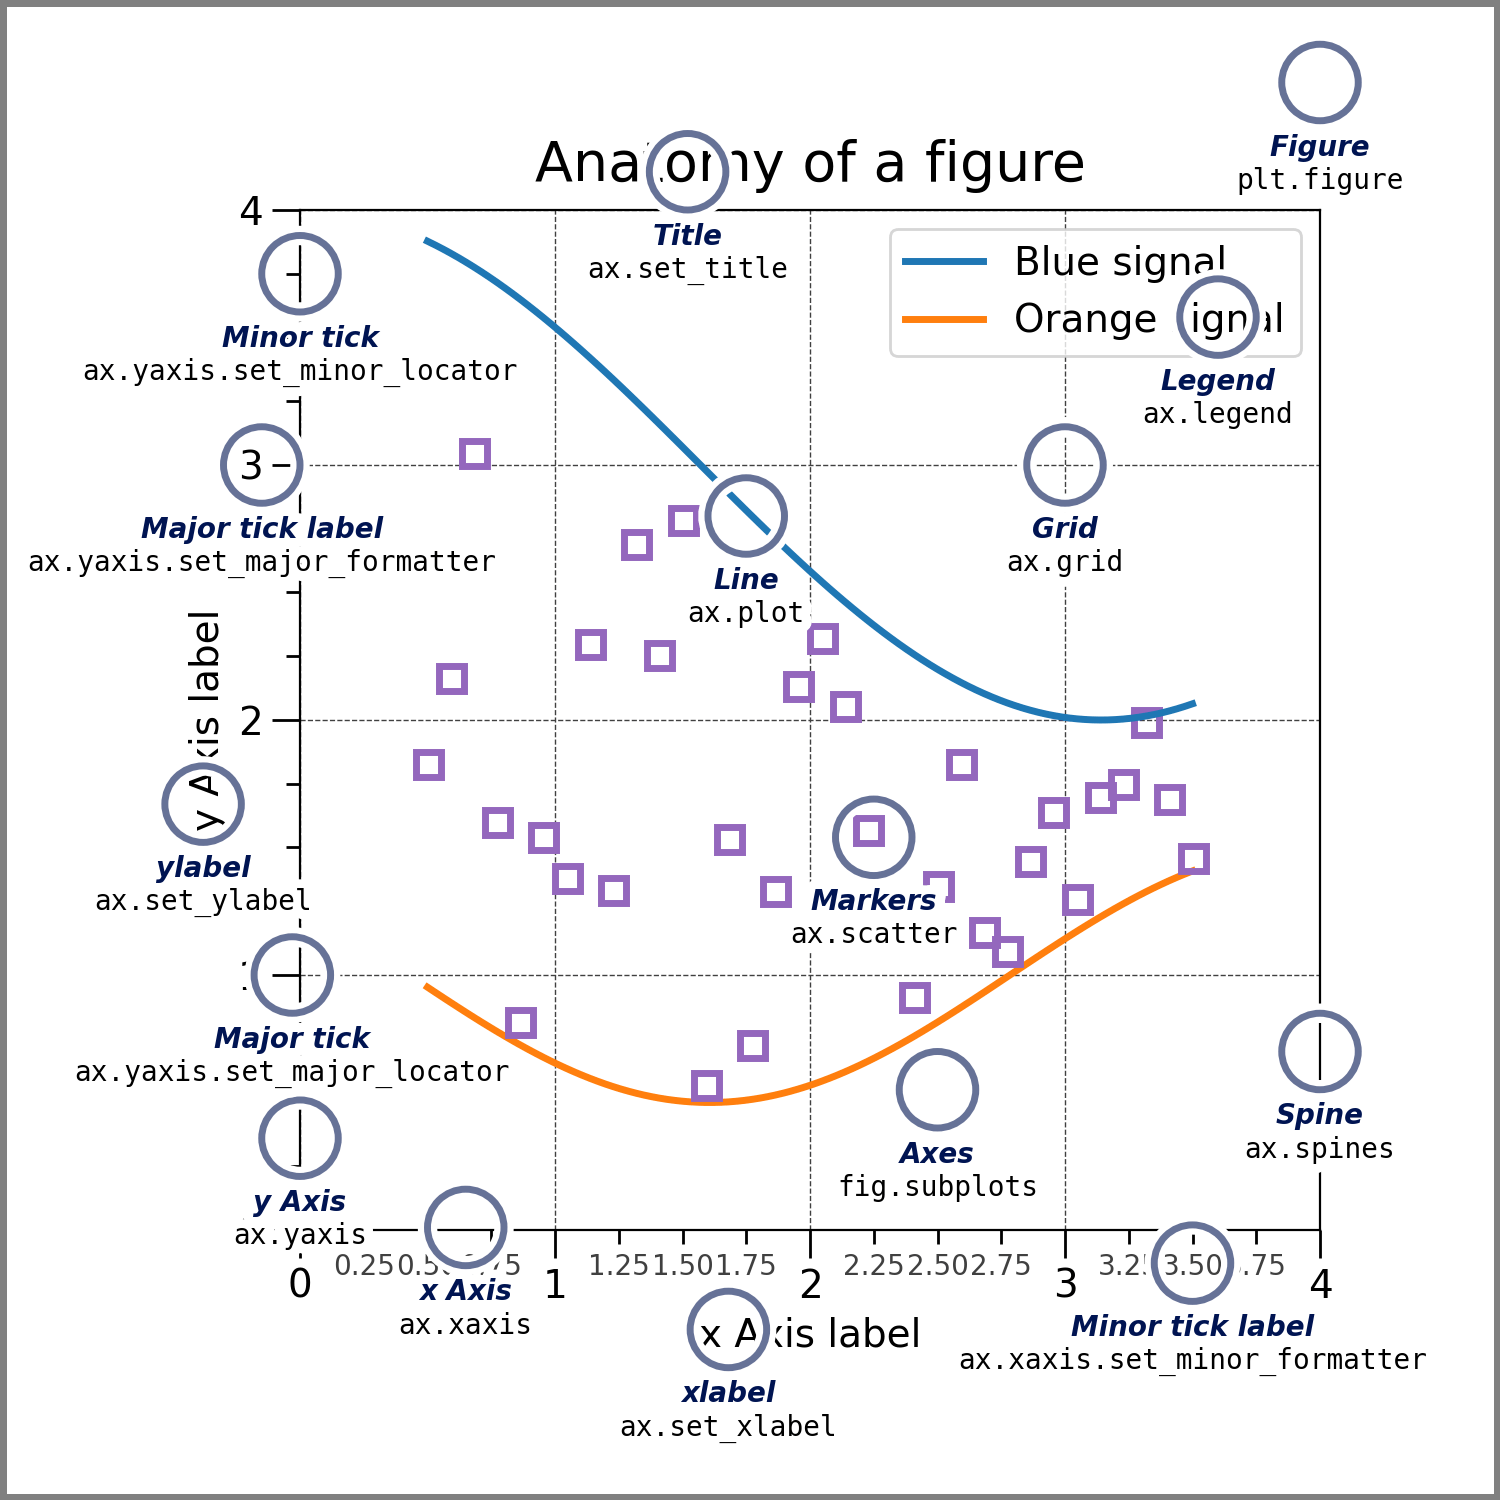
Fuente: matplotlib.org


In [ ]:
# Volvemos a crear el plot, ahora agregando lo que queremos en el eje x
plt.plot(reca['período'],reca['subtotal'])

# Agregamos título, y nombre a los ejes
plt.title('Recaudación en millones de pesos')
plt.xlabel('Año')
plt.ylabel('Monto recaudado')


      
    

Si bien el anterior se ve mejor, seguimos con algunos problemas:
- Seguimos con notación científica. 
- Nos pone los años en el eje x de a 2. 
- Puede que nos interese cambiar el estilo de línea, color, etc. 

Primero puede ser buena idea saber qué tenemos disponible (por ejemplo en colores). 
    

## Colores:

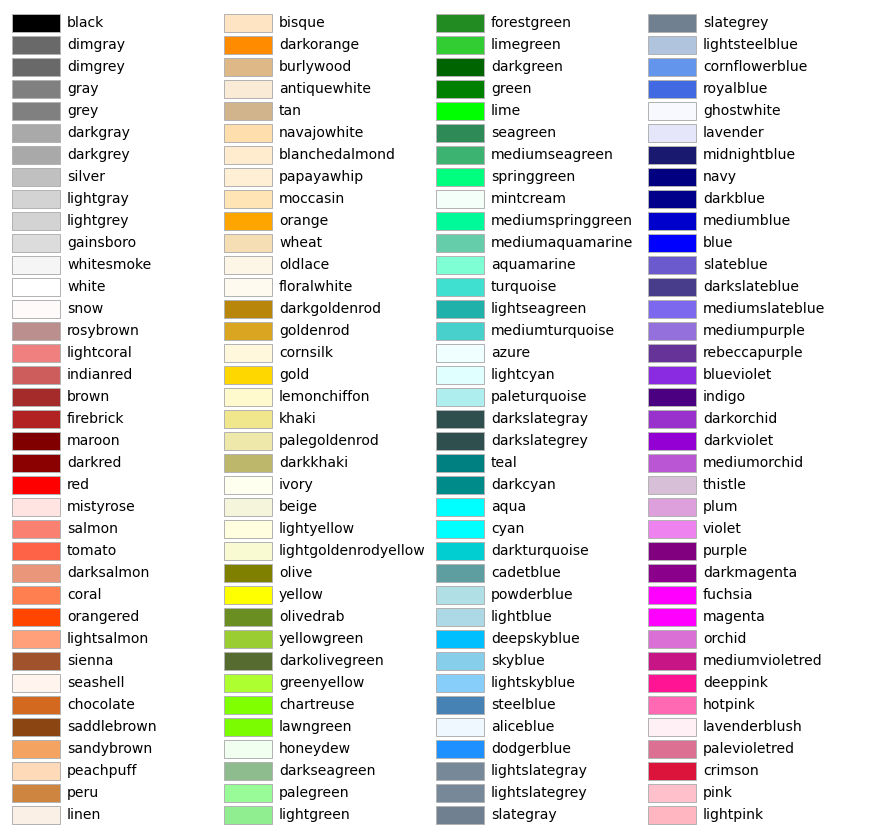
Fuente: matplotlib.org 

Nota: colores disponibles al hacer el notebook, eventualmente controlar al momento de usar. 

## Tipos de línea:
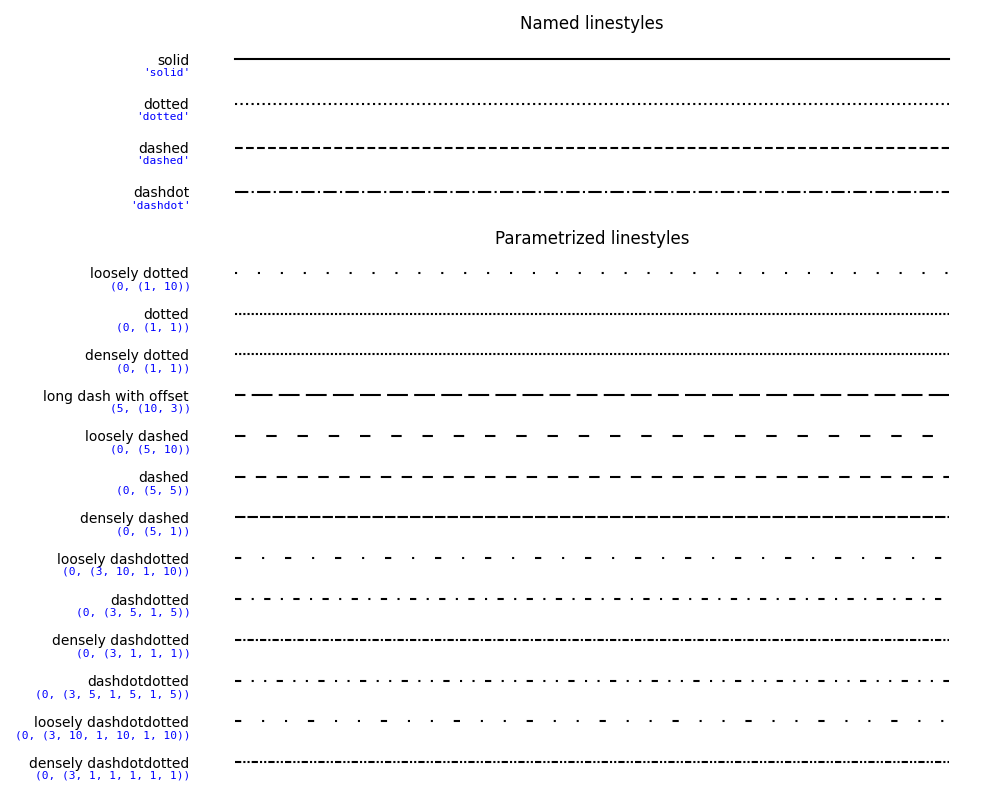
Fuente: matplotlib.org 

Nota: tipos de línea disponibles al hacer el notebook, eventualmente controlar al momento de usar. 

In [ ]:
# Volvemos a crear el plot, especificando las cuestiones de diseño

plt.plot(reca['período'],reca['subtotal'], linestyle = 'dotted', color="black")

# Agregamos título, y nombre a los ejes
plt.ticklabel_format(style='plain')
plt.xticks(reca['período'], rotation=45)
plt.title('Recaudación en millones de pesos')
plt.xlabel('Año')
plt.ylabel('Monto recaudado')

plt.savefig('recaudación 2011-2022.png')


### Notar: 

1. Podemos customizar muchas cosas del gráfico, en el ejemplo anterior hicimos algunas, vamos a hacer otras. 
2. Si no le especificamos ruta, nos guarda en la ruta donde estamos trabajando (donde está el notebook que estamos usando). Si no lo queremos ahí le tenemos que decir dónde. 
3. Depende dónde queramos usar la imagen el formato que nos conviene para guardar: 

        - Latex: PDF
        - Sitio web: SVG
        - Word: PNG





## Graficando más de una serie, con eje secundario

Supongamos que ahora queremos ver en un mismo gráfico la evolución de IIBB e inmobiliario. 

In [ ]:
# Volvemos a crear el plot, especificando ambas series

plt.plot(reca['período'],reca['ingresos brutos'])
plt.plot(reca['período'],reca['inmobiliario'])
# Agregamos título, y nombre a los ejes
plt.ticklabel_format(style='plain')
plt.xticks(reca['período'], rotation=45)
plt.title('Recaudación en millones de pesos')
plt.xlabel('Año')
plt.ylabel('Monto recaudado')

plt.show()



Como vemos, por una cuestión de escala la serie de inmobiliario no se puede apreciar, además de que a simple vista no sé cuál es cuál.

Comencemos por hacer la parte de estilo, luego vamos a la creación del eje secundario. 

In [ ]:
# Volvemos a crear el plot, especificando ambas series, lo puedo hacer por separado, queda más cómodo

plt.plot(reca['período'],reca['ingresos brutos'], linestyle = "dashdot", color="royalblue", label="Ingresos brutos")
plt.plot(reca['período'],reca['inmobiliario'], linestyle = (0,(5,5)), color="maroon", label="Inmobiliario")
# Agregamos título, y nombre a los ejes
plt.ticklabel_format(style='plain')
plt.xticks(reca['período'], rotation=45)
plt.title('Recaudación en millones de pesos')
plt.xlabel('Año')
plt.ylabel('Monto recaudado')
plt.legend()

plt.show()
#plt.savefig('recaudación 2011-2022.png')


In [ ]:
# Volvemos a crear el plot, especificando ambas series, creando ahora un eje secundario
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.plot(reca['período'],reca['ingresos brutos'], linestyle = "dashdot", color="royalblue", label="Ingresos brutos")
ax1.legend(loc='upper left',  ncol=1,
            borderaxespad=0, frameon=False)
ax2.plot(reca['período'],reca['inmobiliario'], linestyle = (0,(5,5)), color="maroon", label="Inmobiliario")
ax2.legend(loc='upper center',  ncol=1,
            borderaxespad=0, frameon=False)
# Agregamos título, y nombre a los ejes

ax1.ticklabel_format(style='plain')
plt.xticks(reca['período'])

plt.title('Recaudación en millones de pesos- IIBB e Inmobiliario')
ax1.set_xlabel('Año')
ax1.set_ylabel('Recaudación IIBB', color='g')
ax2.set_ylabel('Recaudación Inmobiliario', color='b')



plt.show()
#plt.savefig('recaudación 2011-2022.png')


# <center> Gráficos de barras

In [ ]:
reca.plot(x="período", y=["inmobiliario"], kind="bar") 

¿Qué pasa si sumamos otra serie?

In [ ]:
reca.plot(x="período", y=["inmobiliario", "automotor"], kind="bar") 

¿Qué pasa si queremos por año las barras apiladas?

In [ ]:
reca.plot(x="período", y=["inmobiliario", "automotor"], kind="bar", stacked=True) 

¿Qué pasa si quiero las barras horizontales?

In [ ]:
# Normalizar los datos excluyendo la última columna
df=reca.drop(columns=['subtotal', 'período'], inplace=False)
df

df_normalized = df.div(df.sum(axis=1), axis=0) * 100

# Crear un gráfico de barras apiladas con los datos normalizados
ax=df_normalized.plot( kind='bar', stacked=True, colormap="Set1")

# Configuración adicional
ax.set_ylabel('Porcentaje')
ax.set_title('Composición de Recaudación por año', fontweight="bold")
plt.legend(title='Impuestos', loc='upper right')

# Utilizar la columna período del dataframe original como etiquetas en el eje X
ax.set_xticklabels(reca["período"], rotation=25)

#Saco la leyenda afuera (si no me ocupa medio gráfico)
ax.legend(bbox_to_anchor=(1, 1))



## Colormaps 

Hay muchos, varios son en una misma familia de colores, que a veces no nos son muy útiles, van algunos que quizás sirvan.

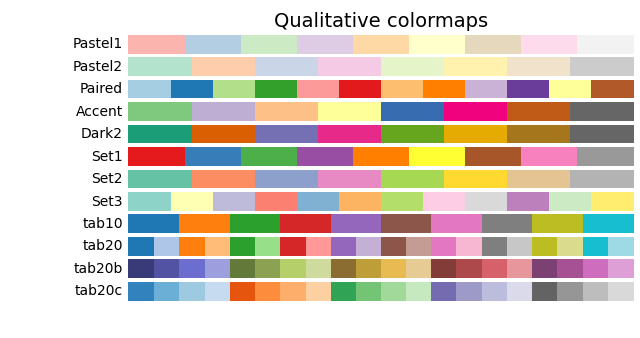
Fuente: matplotlib.
Nota: estos son los mapas de colores cualitativos, hay otros, eventualmente revisar la bibliografía.

# <center> Gráficos de torta
    
    Puede interesarnos hacer un gráfico de torta de un año solo. 

In [ ]:
reca.set_index('período', inplace=True)
reca

In [ ]:

# Seleccionar los datos para el año 2022
reca_2022 = reca[["inmobiliario", "ingresos brutos", "automotor", "sellos"]].loc[2022]

 # Ajusta el tamaño del gráfico
plt.figure(figsize=(6, 6)) 
plt.pie(reca_2022, labels=reca_2022.index, autopct='%1.1f%%', startangle=140)
plt.title('Composición de la recaudación bonaerense en 2022')

Cambiamos colores, y el look del gráfico

In [ ]:

# Seleccionar los datos para el año 2022
explode = (0.1, 0, 0.3, 0) 
 # Ajusta el tamaño del gráfico
plt.figure(figsize=(6, 6)) 
plt.pie(reca_2022, labels=reca_2022.index, explode=explode, autopct='%1.1f%%', startangle=0, shadow=True, colors=['tomato', 'cornflowerblue', 'gold', 'orchid'])
plt.title('Composición de la recaudación bonaerense en 2022')

Qué pasaría si en una misma figura quisiera poner varios gráficos juntos, para los distintos años

In [ ]:
# Seleccionar las columnas de impuestos a incluir en los gráficos de torta
columnas_impuestos = ['ingresos brutos', 'sellos', 'automotor', 'inmobiliario']

# Crear una figura con subplots para cada año
fig, axes = plt.subplots(nrows=1, ncols=len(reca.index[-4:]), figsize=(12 , 4))
fig.suptitle('Composición de Recaudación por Año 2019-2022')

# Iterar a través de los años y crear un gráfico de torta para cada uno
for i, year in enumerate(reca.index[-4:]):
    recaudacion_year = reca.loc[year][columnas_impuestos]
    ax = axes[i]
    
    ax.pie(recaudacion_year, labels=recaudacion_year.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'cornflowerblue', 'gold', 'orchid'], textprops={'fontsize': 6} )
    ax.set_title(f'Año {year}')
plt.savefig(r'C:\Users\USUARIO\Dropbox\CEFIP\python\jupyter-notebooks\Notebooks\Clase 3\composicion 2019-2022.png', bbox_inches='tight', edgecolor='none')
plt.show()



# <CENTER> PAQUETE SEABORN
    
    
¿Pór qué lo usaríamos?

- **Estilo predeterminado atractivo:** Seaborn tiene estilos predeterminados que hacen que las visualizaciones sean más atractivas desde el principio.
    
- **Facilidad de uso para gráficos estadísticos:** Seaborn se especializa en visualizaciones de datos estadísticos. Ofrece funciones específicas para gráficos como box plots, violin plots y pair plots, lo que facilita la representación de relaciones y distribuciones en los datos.

- **Integración con estructuras de datos de Pandas:** Seaborn funciona de manera fluida con DataFrames de Pandas.
    
- **Visualizaciones categóricas mejoradas:** Seaborn es especialmente útil para visualizar datos categóricos, como gráficos de barras y heatmaps. 

- **Estilización y personalización sencillas:** Seaborn facilita la personalización de gráficos con parámetros sencillos. 

- **Soporte para trazar datos complejos:** Seaborn es útil para visualizar relaciones entre múltiples variables, como scatter plots con colores codificados por una cuarta dimensión, lo que puede ser más complicado en Matplotlib.

- **Estilo de gráficos "darkgrid" y "whitegrid" para presentaciones y documentos técnicos, y un estilo "notebook" específico para cuadernos de Jupyter.
    

[Info de seaborn](https://seaborn.pydata.org/)    

Reemplaza a matplotlib? no, seguramente tendremos que usar un conjunto de ambos! Además seaborn trabaja **sobre matplotlib**

In [ ]:
# Importamos Seaborn para potenciar matplotlib 
import seaborn as sns

In [ ]:
#Primero hagamos un scatter sencillo con matplotlib
plt.scatter(x='Año', y='Kilometraje', data=dataset)

In [ ]:
# Default scatterplot, ahora con seaborn
sns.lmplot(x='Año', y='Kilometraje', data=dataset)

In [ ]:
# Supongamos que queremos ver una tercera dimensión (el motor)
sns.lmplot(x='Año', y='Kilometraje', data=dataset, fit_reg=False, hue='Motor', palette="flare")

Como vemos, el scatter default de seaborn incluye nombre a los ejes, línea de regresión, intensidad enlos colores cuando se superponen, etc, cosa que el de matplotlib no. Naturalmente, podemos siempre customizar el plot de seaborn.

### Densidad

In [ ]:
sns.kdeplot(data=dataset, x="Valor", hue="Cero_km", multiple="stack")
sns.set_theme(style="darkgrid", context="talk", palette="colorblind")

#sns.set_theme(style="white", context="paper", palette="pastel")

plt.title('Valor de los Autos')
plt.xlabel('Valor del auto')
plt.ylabel('Densidad')
plt.legend(title='Condición', labels=['Cero km', 'Usado'])
plt.ticklabel_format(style='plain')
plt.xlim(0, 100000)

### Paletas de color en Seaborn

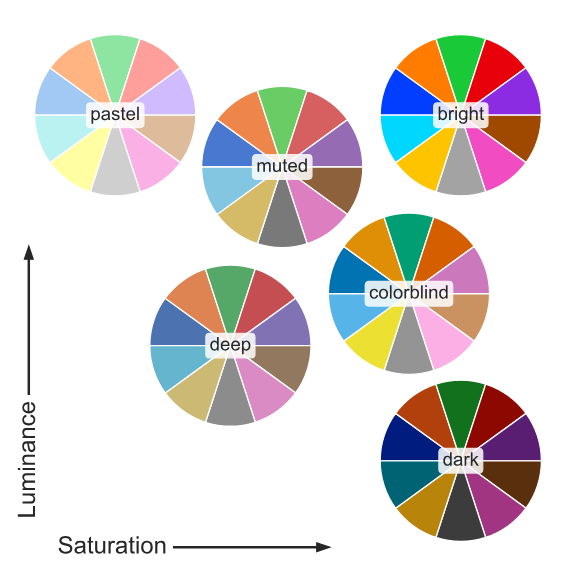
<center> Fuente: seaborn.pydata.org

### Antes de irnos...

Una librería para gráficos interactivos: **Plotly**

In [ ]:
import plotly.express as px

In [ ]:
# Crear un scatter plot interactivo con Plotly Express
fig = px.scatter(data_frame=dataset, x='Kilometraje', y='Año', color='Motor',
                 title='Kilometraje, años y motor',
                 labels={'Kilometraje': 'Kilometraje', 'Año': 'Año'})


fig.show()


# Exportar el gráfico a un archivo HTML
fig.write_html("scatter_plot_interactivo.html")

# <CENTER> EJERCICIOS 

   ### Para resolver en grupo: 
    
   ### Elijan una de las siguientes tareas: 
    
    
- **Recaudación:** 
    

    - Grafique con seaborn la serie de impuesto a los sellos, customizando como desee el gráfico, indicando nombre a los ejes y pinte de un color distinto la región correspondiente al último mandato (2019-2022).
    

    

- **Recaudación:** 
    

    - Grafique con seaborn la serie de impuesto a la herencia , customizando como desee el gráfico, indicando nombre a los ejes y muestre con una línea o flecha el año de la pandemia (2020). 
    

    
    
  ### En todos los casos sumen los gráficos que exporten en formato pdf al repositorio del grupo (hagan el commit). 